<a href="https://colab.research.google.com/github/Praveen-Web-Dev/Renewable-Dataset-Analysis/blob/main/Theme_3_Neglect_of_Rebound_in_Empirical_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving cleaned_dataset.csv to cleaned_dataset (2).csv
📌 Correlation Matrix:
                    renewable_share  energy_per_capita
renewable_share           1.000000          -0.444137
energy_per_capita        -0.444137           1.000000


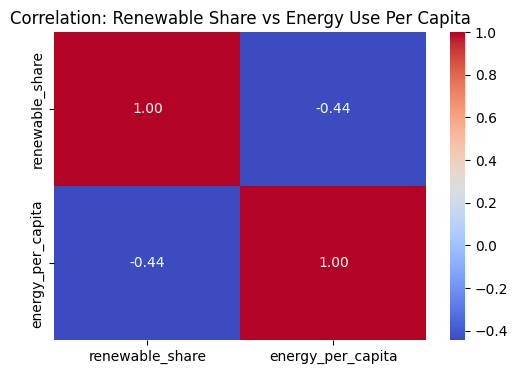

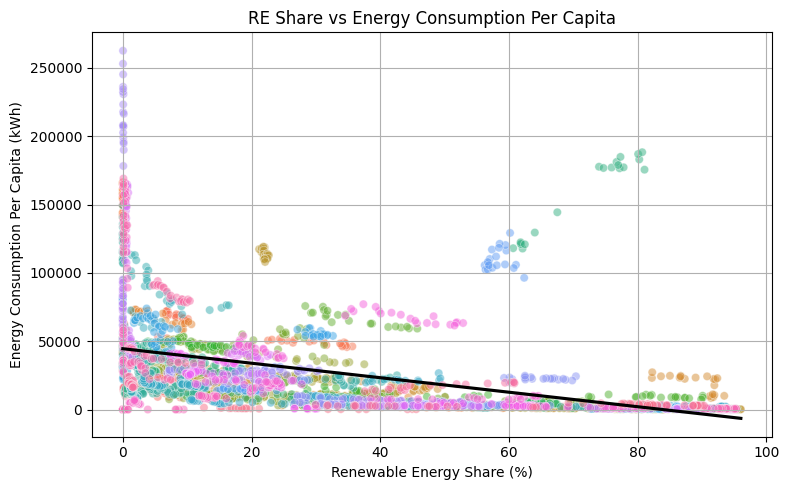

In [3]:
# STEP 1: Upload the dataset
from google.colab import files
uploaded = files.upload()

# STEP 2: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 3: Load the CSV file
df = pd.read_csv("cleaned_dataset.csv")

# STEP 4: Rename relevant columns for easier access
df = df.rename(columns={
    "renewable_energy_share_in_the_total_final_energy_consumption_(%)": "renewable_share",
    "primary_energy_consumption_per_capita_(kwh/person)": "energy_per_capita"
})

# STEP 5: Drop rows with missing values in key columns
df_corr = df[["entity", "year", "renewable_share", "energy_per_capita"]].dropna()

# STEP 6: Calculate Pearson correlation
correlation_matrix = df_corr[["renewable_share", "energy_per_capita"]].corr()
print("📌 Correlation Matrix:\n", correlation_matrix)

# STEP 7: Correlation Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation: Renewable Share vs Energy Use Per Capita")
plt.show()

# STEP 8: Scatter Plot with Regression Line
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_corr, x="renewable_share", y="energy_per_capita", hue="entity", alpha=0.5, legend=False)
sns.regplot(data=df_corr, x="renewable_share", y="energy_per_capita", scatter=False, color="black", ci=None)
plt.title("RE Share vs Energy Consumption Per Capita")
plt.xlabel("Renewable Energy Share (%)")
plt.ylabel("Energy Consumption Per Capita (kWh)")
plt.grid(True)
plt.tight_layout()
plt.show()
